In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test_images', 'train_images', 'test.csv']


In [2]:
from PIL import Image
img = Image.open('../input/train_images/7b9d519cbd66.png')
img.size

(2588, 1958)

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
id_code    1928 non-null object
dtypes: object(1)
memory usage: 15.1+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

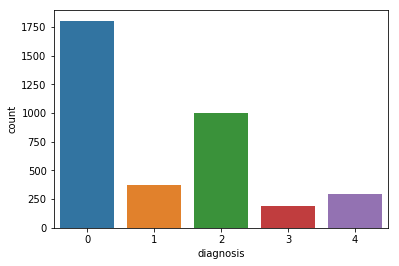

In [7]:
sns.countplot(train['diagnosis'])

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten

Using TensorFlow backend.


In [9]:
model = Sequential()

model.add(Convolution2D(32,3,3,input_shape=(96,96,3),activation='relu'))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(output_dim=128 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_dim=5,activation='softmax'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(96, 96, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  from

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 , 
                                   shear_range = 0.2 ,
                                   zoom_range = 0.2 ,
                                   horizontal_flip = True,
                                  validation_split=0.2)



In [12]:
train['id_code'] = train['id_code'].astype('str')+'.png'
train['diagnosis'] = train['diagnosis'].astype('str')

In [13]:
train_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="../input/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=32,
    shuffle=True,
    class_mode="categorical",
    target_size=(96,96),
    subset='training')

test_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="../input/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=32,
    shuffle=True,
    class_mode="categorical", 
    target_size=(96,96),
    subset='validation')

Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.


In [14]:
model.fit_generator(generator=train_gen,              
                    steps_per_epoch=len(train_gen),
                    validation_data=test_gen,                    
                    validation_steps=len(test_gen),
                    epochs=50,
                    use_multiprocessing = True,
                    verbose=1)

Epoch 1/50
92/92 [==============================] - 427s 5s/step - loss: 1.0562 - acc: 0.6098 - val_loss: 0.9377 - val_acc: 0.6680
Epoch 2/50
92/92 [==============================] - 381s 4s/step - loss: 0.8740 - acc: 0.6950 - val_loss: 0.8513 - val_acc: 0.7022
Epoch 3/50
92/92 [==============================] - 381s 4s/step - loss: 0.8227 - acc: 0.7167 - val_loss: 0.8253 - val_acc: 0.7022
Epoch 4/50
92/92 [==============================] - 377s 4s/step - loss: 0.8143 - acc: 0.7128 - val_loss: 0.8112 - val_acc: 0.7008
Epoch 5/50
92/92 [==============================] - 375s 4s/step - loss: 0.7974 - acc: 0.7233 - val_loss: 0.8361 - val_acc: 0.7090
Epoch 6/50
92/92 [==============================] - 372s 4s/step - loss: 0.7920 - acc: 0.7148 - val_loss: 0.8292 - val_acc: 0.7036
Epoch 7/50
92/92 [==============================] - 374s 4s/step - loss: 0.7849 - acc: 0.7239 - val_loss: 0.8115 - val_acc: 0.7090
Epoch 8/50
92/92 [==============================] - 377s 4s/step - loss: 0.7594 - a

In [26]:
test = pd.read_csv('../input/sample_submission.csv')

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
test['id_code'] = test['id_code'].astype(str)+'.png'

In [30]:
submission=test_datagen.flow_from_dataframe(
    dataframe=test,
    directory="../input/test_images",
    x_col="id_code",    
    batch_size=32,
    shuffle=False,
    class_mode=None, 
    target_size=(96,96)
)

Found 1928 validated image filenames.


In [33]:
predictions = model.predict_generator(submission,steps = len(submission))

In [36]:
prob = np.argmax(predictions,axis=1)

In [37]:
test['diagnosis'] = prob

In [38]:
test.to_csv('aptos_blindness_detection.csv',index=False)